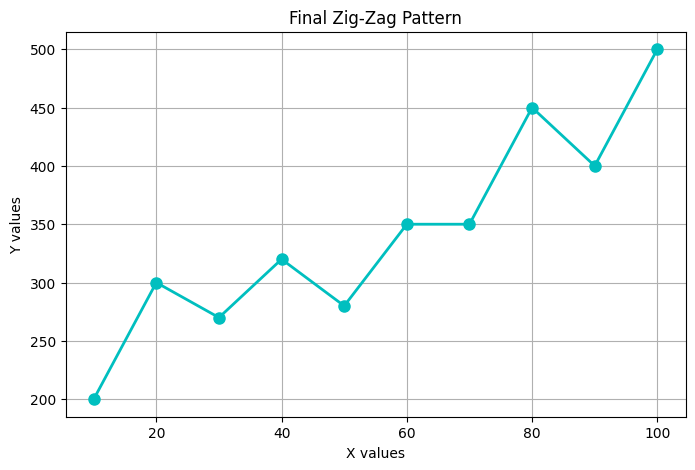

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor

# X and Y values for the modified zig-zag pattern
x_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
y_values = [200, 300, 270, 320, 280, 350, 350, 450, 400, 500]
# Convert input to NumPy arrays (important fix)
x_values = np.array(x_values, dtype=float)

# Plot the data
plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='c', markersize=8, linewidth=2)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Final Zig-Zag Pattern")
plt.grid(True)
plt.show()


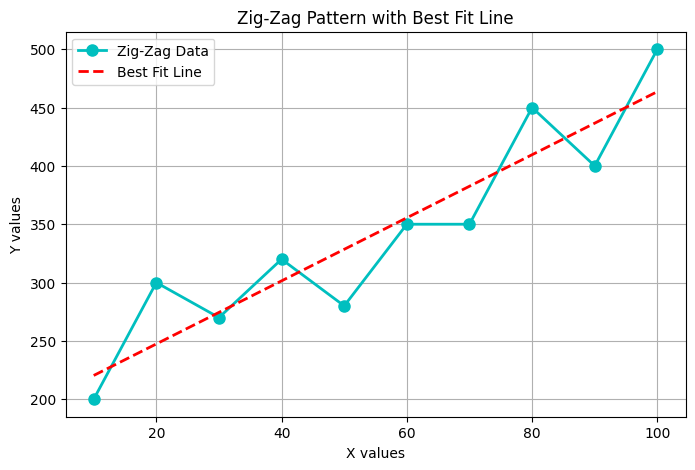

In [47]:

coefficients = np.polyfit(x_values, y_values, 1)  # Linear fit (degree 1)
best_fit_line = np.poly1d(coefficients)

# Generate y-values for the best fit line
y_fit = best_fit_line(x_values)

# Plot the data points and the best fit line
plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='c', markersize=8, linewidth=2, label="Zig-Zag Data")
plt.plot(x_values, y_fit, linestyle='--', color='r', linewidth=2, label="Best Fit Line")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Zig-Zag Pattern with Best Fit Line")
plt.legend()
plt.grid(True)
plt.show()


BRUTE FORCE - A brute force algorithm systematically explores all possible solutions to find the best one. It is simple but computationally expensive, as it checks every possibility without optimization. In the context of the best fit line, the algorithm evaluates all pairs of points to compute possible lines, then checks how many data points each line passes through (within a small tolerance). The line that touches the most points is selected as the best fit. This approach guarantees the best solution but has a time complexity of O(n²), making it inefficient for large datasets. Despite its inefficiency, brute force is useful when the dataset is small and accuracy is critical. 🚀

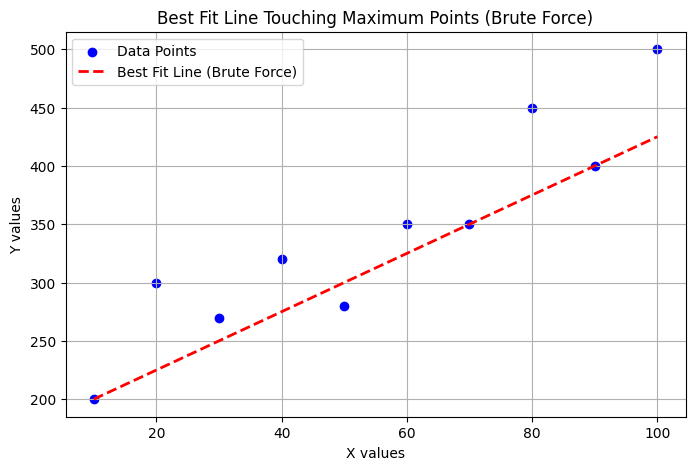

Best Fit Line Equation (Brute Force): y = 2.50x + 175.00
Number of points touching the best fit line: 3


In [48]:
def brute_force_best_fit(x_values, y_values, tolerance=1e-2):
    best_m, best_b = None, None
    max_count = 0

    # Iterate through all pairs of points
    for (x1, y1), (x2, y2) in combinations(zip(x_values, y_values), 2):
        if x1 == x2:
            continue  # Skip vertical lines

        # Compute slope (m) and intercept (b)
        m = (y2 - y1) / (x2 - x1)
        b = y1 - m * x1

        # Count points that lie on the line within tolerance
        count = sum(abs(y_values - (m * x_values + b)) < tolerance)

        # Update best fit line if this one touches more points
        if count > max_count:
            max_count = count
            best_m, best_b = m, b

    return best_m, best_b, max_count



# Get the best fit line using brute force
best_m, best_b, max_count = brute_force_best_fit(x_values, y_values)

# Generate best fit line values
y_best_fit = best_m * x_values + best_b

# Plot the data points and best fit line
plt.figure(figsize=(8, 5))
plt.scatter(x_values, y_values, color='b', label="Data Points")
plt.plot(x_values, y_best_fit, linestyle='--', color='r', linewidth=2, label="Best Fit Line (Brute Force)")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Best Fit Line Touching Maximum Points (Brute Force)")
plt.legend()
plt.grid(True)
plt.show()

# Print the best fit line equation
print(f"Best Fit Line Equation (Brute Force): y = {best_m:.2f}x + {best_b:.2f}")
print(f"Number of points touching the best fit line: {max_count}")

RANSAC (Random Sample Consensus) is an iterative algorithm used to fit a model to data while handling outliers effectively. Unlike brute force, which checks all possible solutions, RANSAC randomly selects a small subset of points to estimate the best fit line and then verifies how well the rest of the data fits the model.

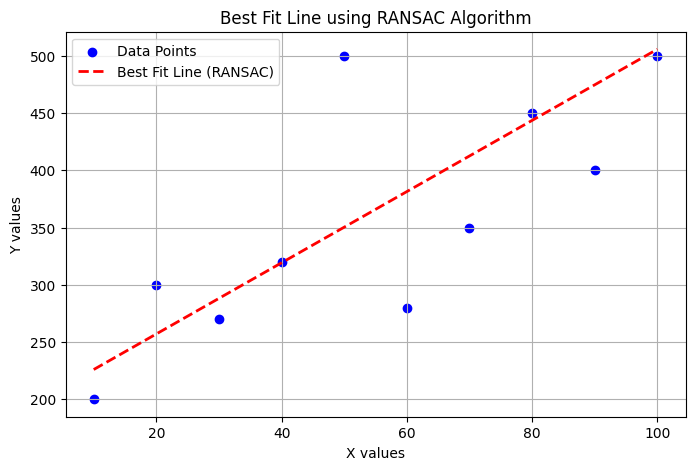

Best Fit Line Equation (RANSAC): y = 3.11x + 194.84


In [49]:
x_values = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100]).reshape(-1, 1)
y_values = np.array([200, 300, 270, 320, 500, 280, 350, 450, 400, 500]) 
# Apply RANSAC to find the best fit line

ransac = RANSACRegressor()
ransac.fit(x_values, y_values)

 # Get the best fit line parameters
best_m = ransac.estimator_.coef_[0]  # Slope
best_b = ransac.estimator_.intercept_  # Intercept

 # Generate best fit line values
y_best_fit = best_m * x_values + best_b

 # Plot the data points and best fit line
plt.figure(figsize=(8, 5))
plt.scatter(x_values, y_values, color='b', label="Data Points")
plt.plot(x_values, y_best_fit, linestyle='--', color='r', linewidth=2, label="Best Fit Line (RANSAC)")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Best Fit Line using RANSAC Algorithm")
plt.legend()
plt.grid(True)
plt.show()

# Print the best fit line equation
print(f"Best Fit Line Equation (RANSAC): y = {best_m:.2f}x + {best_b:.2f}")


Least Squares is the most common method for fitting a best-fit line by minimizing the sum of squared errors between the actual and predicted values.

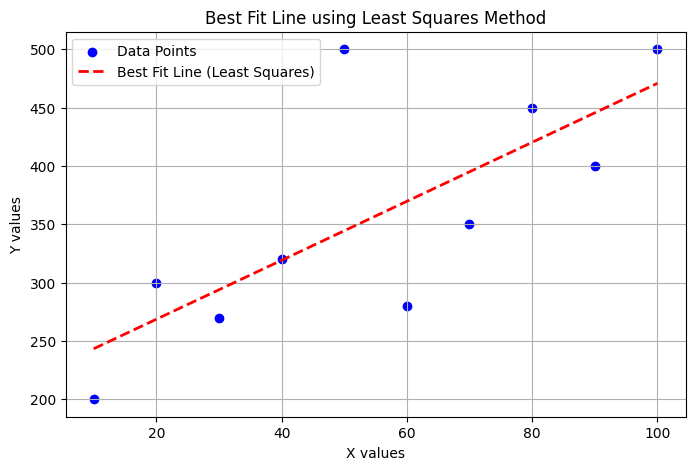

Best Fit Line Equation (Least Squares): y = 2.53x + 218.00


In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
x_values = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
y_values = np.array([200, 300, 270, 320, 500, 280, 350, 450, 400, 500])

# Compute least squares regression line
N = len(x_values)
sum_x = np.sum(x_values)
sum_y = np.sum(y_values)
sum_xy = np.sum(x_values * y_values)
sum_x2 = np.sum(x_values ** 2)

# Calculate slope (m) and intercept (b)
best_m = (N * sum_xy - sum_x * sum_y) / (N * sum_x2 - sum_x**2)
best_b = (sum_y - best_m * sum_x) / N

# Generate best fit line values
y_best_fit = best_m * x_values + best_b

# Plot the data points and best fit line
plt.figure(figsize=(8, 5))
plt.scatter(x_values, y_values, color='b', label="Data Points")
plt.plot(x_values, y_best_fit, linestyle='--', color='r', linewidth=2, label="Best Fit Line (Least Squares)")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Best Fit Line using Least Squares Method")
plt.legend()
plt.grid(True)
plt.show()

# Print the best fit line equation
print(f"Best Fit Line Equation (Least Squares): y = {best_m:.2f}x + {best_b:.2f}")


The Theil-Sen estimator is a robust method for linear regression that is less sensitive to outliers than ordinary least squares (OLS). Instead of fitting the line to minimize squared errors, Theil-Sen computes the median of all possible slopes between pairs of points.

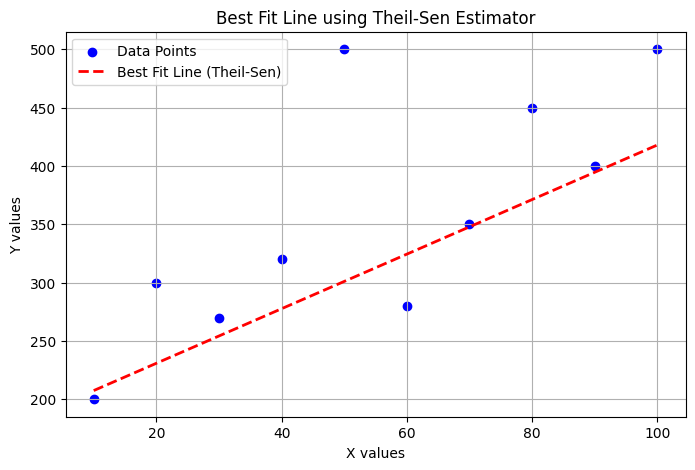

Best Fit Line Equation (Theil-Sen): y = 2.34x + 184.03


In [51]:
# Sample data (with some outliers)
x_values = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100]).reshape(-1, 1)
y_values = np.array([200, 300, 270, 320, 500, 280, 350, 450, 400, 500])  # 500 is an outlier

# Apply Theil-Sen regression
theil_sen = TheilSenRegressor()
theil_sen.fit(x_values, y_values)

# Get best fit line parameters
best_m = theil_sen.coef_[0]  # Slope
best_b = theil_sen.intercept_  # Intercept

# Generate best fit line values
y_best_fit = best_m * x_values + best_b

# Plot the data points and best fit line
plt.figure(figsize=(8, 5))
plt.scatter(x_values, y_values, color='b', label="Data Points")
plt.plot(x_values, y_best_fit, linestyle='--', color='r', linewidth=2, label="Best Fit Line (Theil-Sen)")
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Best Fit Line using Theil-Sen Estimator")
plt.legend()
plt.grid(True)
plt.show()

# Print the best fit line equation
print(f"Best Fit Line Equation (Theil-Sen): y = {best_m:.2f}x + {best_b:.2f}")